**Difference between Optimizers:**

(SGD , SGD+Momentum , RMSprop , Adam)

In [60]:
import numpy as np
import matplotlib.pyplot as plt


In [61]:
#random-data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [62]:
X.shape , y.shape

((100, 1), (100, 1))

In [63]:
X_b = np.c_[np.ones((100, 1)), X] # merging bias into X

In [64]:
w = np.random.randn(2, 1) # random weights initialization

In [65]:
def mse_loss(X, y , w): #defining loss function
  m = len(y)
  pred = np.dot(X,w)
  loss = np.sum((pred - y)**2/(2*m))
  return loss

In [66]:
def mse_grad(X , y, w): #calculating gradient of loss function
  m = len(y)
  grad = X.T.dot(X.dot(w)-y)/m
  return grad


In [88]:
learning_rate = 0.01 #defining hyperparameters
num_iterations = 500
beta = 0.9
beta_1 = 0.9
beta_2 = 0.99
epsilon = 1e-8

In [68]:
def SGD(X , y , w, lr_rate , num_iter):
  m = len(y)
  losses = []
  for itr in range(num_iter):
    random_index = np.random.randint(m) 
    xi = X[random_index: random_index + 1]
    yi = y[random_index: random_index + 1]
    grad = mse_grad(xi , yi , w)
    w = w - lr_rate *grad 
    loss = mse_loss(X,y , w)
    losses.append(loss)
  return w , losses

In [69]:
def SGD_momentum(X , y , w , lr_rate , beta, num_iter):
  m = len(y)
  v = np.zeros_like(w)
  losses = []
  for itr in range(num_iter):
    random_index = np.random.randint(m)
    xi = X[random_index: random_index + 1]
    yi = y[random_index: random_index + 1]
    grad = mse_grad(xi , yi , w)
    v = beta*v + lr_rate * grad
    w = w - v
    loss = mse_loss(X , y , w)
    losses.append(loss)
  return w , losses


In [70]:
def RMSprop(X , y , w , lr_rate, beta , epsilon , num_iter):
  m = len(y)
  s = np.zeros_like(w)
  losses = []
  for itr in range(num_iter):
    random_index = np.random.randint(m)
    xi = X[random_index: random_index + 1]
    yi = y[random_index: random_index + 1]
    grad = mse_grad(xi , yi , w)
    s = beta*s + (1- beta)* grad**2
    w = w - (lr_rate/(np.sqrt(s) + epsilon))* grad
    loss = mse_loss(X, y , w)
    losses.append(loss)
  return w , losses


In [76]:
def Adam(X , y , w , lr_rate , beta_1 , beta_2 , epsilon , num_iter):
  m = len(y)
  m_hat = np.zeros_like(w)
  v_hat = np.zeros_like(w)
  losses = []
  for itr in range(num_iter):
    random_index = np.random.randint(m)
    xi = X[random_index: random_index + 1]
    yi = y[random_index: random_index + 1]
    grad = mse_grad(xi , yi , w)
    m_hat = beta_1* m_hat + (1-beta_1)*grad
    v_hat = beta_2* v_hat + (1-beta_2)*grad**2
    m_hat_corrected = m_hat / (1 - beta_1**(itr+1))
    v_hat_corrected = v_hat / (1 - beta_2**(itr+1))
    w = w - (lr_rate / (np.sqrt(v_hat_corrected) + epsilon)) * m_hat_corrected
    loss = mse_loss(X, y, w)
    losses.append(loss)
  return w , losses
    


In [89]:
sgd_theta, sgd_losses = SGD(X_b, y, w, learning_rate, num_iterations)
sgd_momentum_theta, sgd_momentum_losses = SGD_momentum(X_b, y, w, learning_rate, beta, num_iterations)
rmsprop_theta, rmsprop_losses = RMSprop(X_b, y, w, learning_rate, beta, epsilon, num_iterations)
adam_theta, adam_losses = Adam(X_b, y, w, learning_rate, beta_1, beta_2, epsilon, num_iterations)

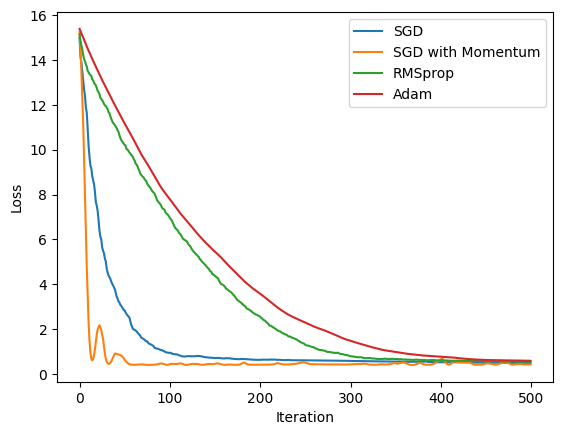

In [90]:
plt.plot(range(num_iterations), sgd_losses, label='SGD')
plt.plot(range(num_iterations), sgd_momentum_losses, label='SGD with Momentum')
plt.plot(range(num_iterations), rmsprop_losses, label='RMSprop')
plt.plot(range(num_iterations), adam_losses, label='Adam')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()